In [71]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
import csv
%matplotlib inline

In [85]:
df_stream = pd.read_csv('streaming_data.csv')
df = df_stream[['Time','Temperature','Humidity']]
df.sample(5)

,Time,Temperature,Humidity
654,852.0,20.7,75.4
626,824.0,20.7,75.2
249,447.0,20.8,75.2
1348,1546.0,20.6,75.5
1608,1806.0,20.7,75.3


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 3 columns):
Time           1836 non-null float64
Temperature    1836 non-null float64
Humidity       1836 non-null float64
dtypes: float64(3)
memory usage: 43.2 KB


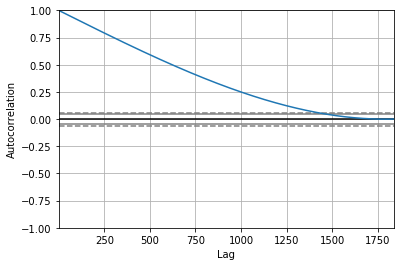

In [27]:
# Autocorrelation Plot: plots autocorrelation for a large # of lags in time series
autocorrelation_plot(df)
plt.show()

Positive correaltion with the first 1500 lags, a good starting point for the AR parameter of the mode may be 500

## ARIMA Model

- Used to analyze and forecast time series data:

    **AR**: Autoregression. A model that uses the dependent relationship 
between an observation and some number of lagged observations.

    **I**: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
    
    **MA**: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


References
- How to Make Out-of-Sample Forecasts with ARIMA in Python:
https://machinelearningmastery.com/make-sample-forecasts-arima-python/

- ARIMA for Time Series
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

## Only using the temperature feature

Take out the last 25 samples to use as validation of model

In [113]:
num_sample = 25
split_point = len(df['Temperature']) - num_sample
dataset, validation = df['Temperature'][0:split_point], df['Temperature'][split_point:]
print('Train Dataset %d, Validation %d' % (len(dataset), len(validation)))

Train Dataset 1811, Validation 25


In [114]:
X = dataset.values
model = ARIMA(X, order=(10,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1811
Model:                    ARMA(10, 1)   Log Likelihood                3330.143
Method:                       css-mle   S.D. of innovations              0.038
Date:                Fri, 27 Nov 2020   AIC                          -6634.285
Time:                        15:04:30   BIC                          -6562.764
Sample:                             0   HQIC                         -6607.892
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7219      0.090    231.022      0.000      20.546      20.898
ar.L1.y        0.1199      0.027      4.495      0.000       0.068       0.172
ar.L2.y        0.1149      0.027      4.302      0.0

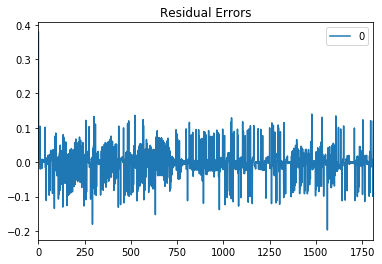

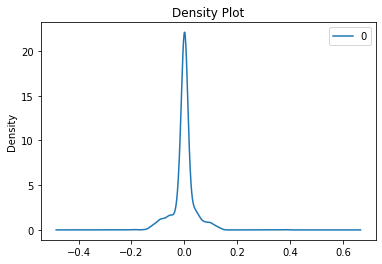

                 0
count  1811.000000
mean     -0.000949
std       0.039392
min      -0.197095
25%      -0.009585
50%       0.000255
75%       0.009823
max       0.378096


In [115]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title("Residual Errors")
plt.show()
residuals.plot(kind='kde')
plt.title("Density Plot")
plt.show()
print(residuals.describe())

## One-step Out-of-Sample Forecast

A forecast of the very next time step in the sequence from the available data used to fit the model.

In [116]:
forecast = model_fit.forecast()[0]
print('Forecast: %f' % forecast)

Forecast: 20.702878


Prediction on the next time increment after the last data row in the model dataset (i.e. train). It should be similar to the first row of the validation dataset.

In [117]:
validation.values[0]

20.7

In [129]:
# Multi-step out-of-sample forecast
predictions = model_fit.forecast(steps=num_sample)[0]
mult_len = len(predictions)
obs = validation.values[:mult_len]
for i in range(mult_len):
    print('predicted=%f, expected=%f' % (predictions[i], obs[i]))

predicted=20.702878, expected=20.700000
predicted=20.610117, expected=20.700000
predicted=20.610238, expected=20.700000
predicted=20.601833, expected=20.600000
predicted=20.602308, expected=20.600000
predicted=20.608584, expected=20.600000
predicted=20.608473, expected=20.600000
predicted=20.596018, expected=20.600000
predicted=20.605750, expected=20.600000
predicted=20.631296, expected=20.600000
predicted=20.624950, expected=20.600000
predicted=20.613627, expected=20.600000
predicted=20.613254, expected=20.600000
predicted=20.611598, expected=20.600000
predicted=20.612799, expected=20.600000
predicted=20.614864, expected=20.600000
predicted=20.615042, expected=20.600000
predicted=20.614093, expected=20.600000
predicted=20.616738, expected=20.600000
predicted=20.619700, expected=20.600000
predicted=20.618280, expected=20.600000
predicted=20.617158, expected=20.700000
predicted=20.617264, expected=20.700000
predicted=20.617337, expected=20.600000
predicted=20.618005, expected=20.600000


Test MSE: 0.001


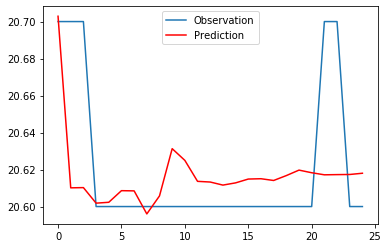

In [130]:
error = mean_squared_error(obs, predictions)
print('Test MSE: %.3f' % error)
plt.plot(obs,label='Observation')
plt.plot(predictions, color='red', label='Prediction')
plt.legend()
plt.show()

## More to do: use Box-Jenkins Methodology to find optimal parameters for ARIMA model
* https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

## ARIMA on Humidity

In [136]:
num_sample = 25
split_point = len(df['Humidity']) - num_sample
dataset, validation = df['Humidity'][0:split_point], df['Humidity'][split_point:]
print('Train Dataset %d, Validation %d' % (len(dataset), len(validation)))

Train Dataset 1811, Validation 25


In [137]:
X = dataset.values
model = ARIMA(X, order=(10,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1811
Model:                    ARMA(10, 1)   Log Likelihood                1734.294
Method:                       css-mle   S.D. of innovations              0.093
Date:                Fri, 27 Nov 2020   AIC                          -3442.587
Time:                        15:07:27   BIC                          -3371.066
Sample:                             0   HQIC                         -3416.194
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.1311      0.071   1060.328      0.000      74.992      75.270
ar.L1.y        0.0357      0.024      1.503      0.133      -0.011       0.082
ar.L2.y        1.0076      0.024     42.413      0.0

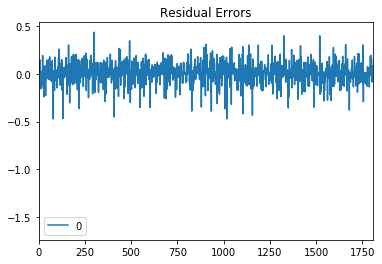

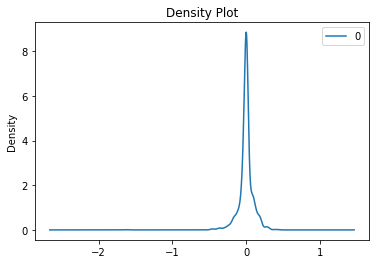

                 0
count  1811.000000
mean      0.000247
std       0.100119
min      -1.631066
25%      -0.025791
50%       0.001759
75%       0.021432
max       0.433437


In [138]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title("Residual Errors")
plt.show()
residuals.plot(kind='kde')
plt.title("Density Plot")
plt.show()
print(residuals.describe())

In [139]:
# Multi-step out-of-sample forecast
predictions = model_fit.forecast(steps=num_sample)[0]
mult_len = len(predictions)
obs = validation.values[:mult_len]
for i in range(mult_len):
    print('predicted=%f, expected=%f' % (predictions[i], obs[i]))

predicted=75.521634, expected=75.500000
predicted=75.471046, expected=75.600000
predicted=75.488300, expected=75.600000
predicted=75.454244, expected=75.500000
predicted=75.470681, expected=75.500000
predicted=75.429381, expected=75.500000
predicted=75.440673, expected=75.500000
predicted=75.411556, expected=75.200000
predicted=75.424887, expected=75.200000
predicted=75.388098, expected=74.900000
predicted=75.396628, expected=74.900000
predicted=75.366321, expected=74.800000
predicted=75.371426, expected=74.800000
predicted=75.345142, expected=74.800000
predicted=75.346540, expected=74.800000
predicted=75.325369, expected=74.800000
predicted=75.324249, expected=74.800000
predicted=75.306772, expected=74.800000
predicted=75.302853, expected=74.800000
predicted=75.289518, expected=74.800000
predicted=75.283635, expected=74.800000
predicted=75.273560, expected=75.000000
predicted=75.266253, expected=75.000000
predicted=75.258878, expected=74.900000
predicted=75.250775, expected=74.900000


Test MSE: 0.152


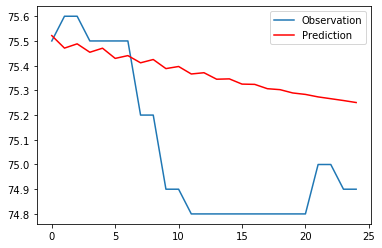

In [140]:
error = mean_squared_error(obs, predictions)
print('Test MSE: %.3f' % error)
plt.plot(obs,label='Observation')
plt.plot(predictions, color='red', label='Prediction')
plt.legend()
plt.show()